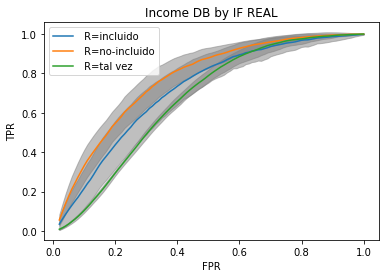

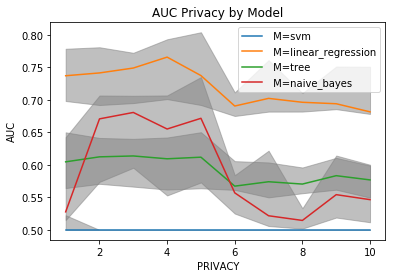

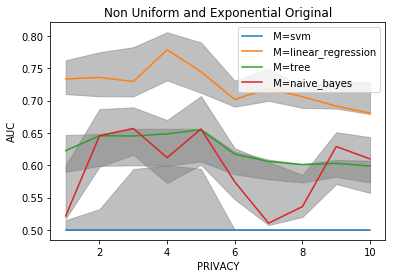

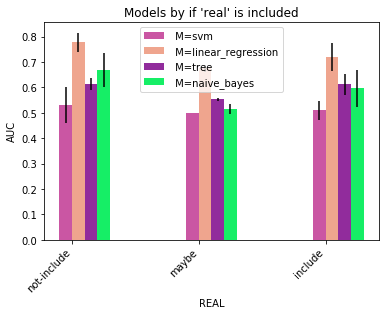

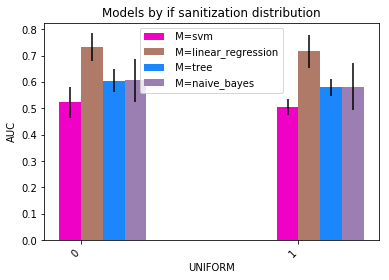

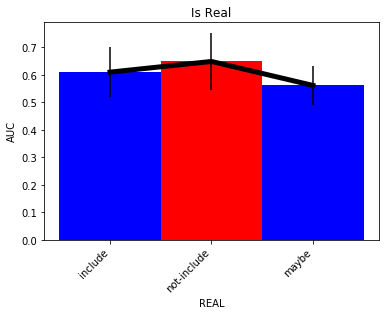

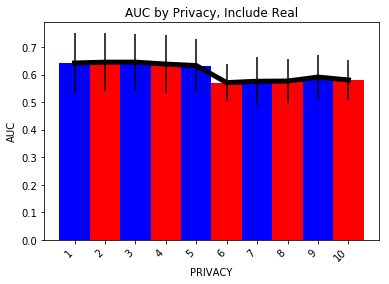

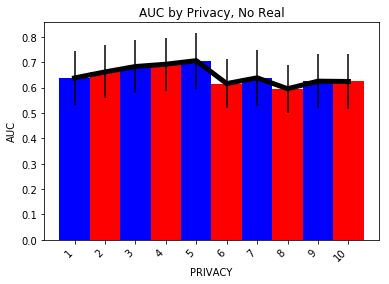

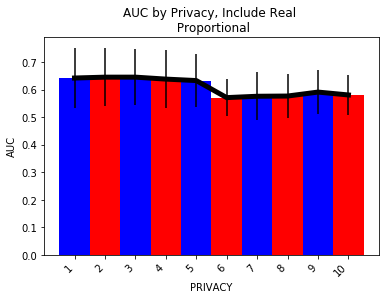

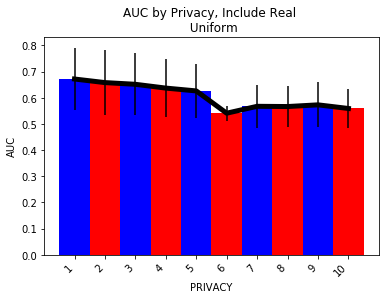

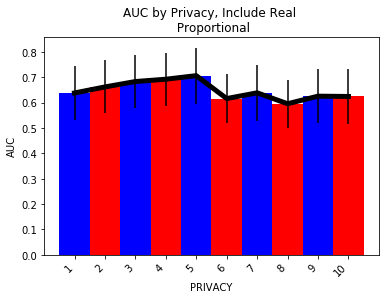

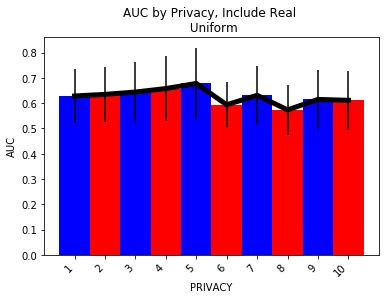

/home/juanzinser/Workspace/Tesis/venv/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


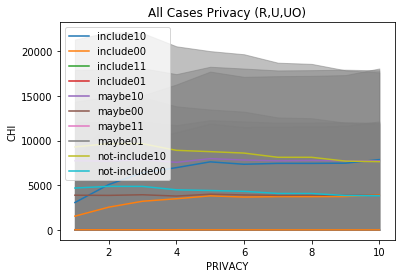

In [ ]:
from sanitization_tools import *
supervised_results = pn.read_csv("model_scores_roc.csv")
non_supervised_results = pn.read_csv("rmse_df_simulated_rel.csv")

lang_labels = "english"
rocs_by_case(supervised_results, {},{"real":["t","f","m"]}, savefig=True, title="by IF REAL", save_name="income_roc_privacy_grouped_tmf",language="spanish")


plot_intervals(supervised_results.copy(), "privacy","auc", {}, 
               {"model":["svm", "linear_regression", "tree", "naive_bayes"]}, savefig=True, 
               title="AUC Privacy by Model", save_name="auc_model_privacy", language=lang_labels)

plot_intervals(supervised_results.copy(), "privacy","auc", {"uniform": [0], "uniform2":[0], "uniform_original":[0]}, 
               {"model":["svm", "linear_regression", "tree", "naive_bayes"]}, savefig=False, 
               title="Non Uniform and Exponential Original", save_name="auc_nclasses00", language=lang_labels)

plot_bars(supervised_results.copy(), "real", "auc", {}, 
               {"model":["svm", "linear_regression", "tree", "naive_bayes"]}, savefig=True, 
               title="Models by if 'real' is included", save_name="include_real_model", width_delta=.1, language=lang_labels)

plot_bars(supervised_results.copy(), "uniform", "auc", {}, 
               {"model":["svm", "linear_regression", "tree", "naive_bayes"]}, savefig=True, 
               title="Models by if sanitization distribution", save_name="uniform_model", width_delta=.1, language=lang_labels)


plot_bars_single_chunk(df = supervised_results, gb_param = "real",yaxis = "auc", base_filter = {}, 
                       lines_cases = {"real":["t","f","m"]}, savefig=True, title="Is Real", 
                       save_name="privacy_is_real", width_delta=.1, language=lang_labels)


plot_bars_single_chunk(df = supervised_results, gb_param = "privacy",yaxis = "auc", base_filter = {"real":"t"}, 
                       lines_cases = {"privacy":[str(i) for i in range(1,11)]}, savefig=True, title="AUC by Privacy, Include Real", 
                       save_name="privacy_auc_bar_t", width_delta=.1, language=lang_labels)
plot_bars_single_chunk(df = supervised_results, gb_param = "privacy",yaxis = "auc", base_filter = {"real":"f"}, 
                       lines_cases = {"privacy":[str(i) for i in range(1,11)]}, savefig=True, title="AUC by Privacy, No Real", 
                       save_name="privacy_auc_bar_f", width_delta=.1, language=lang_labels)
plot_bars_single_chunk(df = supervised_results, gb_param = "privacy",yaxis = "auc", base_filter = {"real":"t", "uniform":0}, 
                       lines_cases = {"privacy":[str(i) for i in range(1,11)]}, savefig=True, title="AUC by Privacy, Include Real \n Proportional", 
                       save_name="privacy_auc_bar_t0", width_delta=.1, language=lang_labels)
plot_bars_single_chunk(df = supervised_results, gb_param = "privacy",yaxis = "auc", base_filter = {"real":"t", "uniform":1}, 
                       lines_cases = {"privacy":[str(i) for i in range(1,11)]}, savefig=True, title="AUC by Privacy, Include Real \n Uniform", 
                       save_name="privacy_auc_bar_t1", width_delta=.1, language=lang_labels)
plot_bars_single_chunk(df = supervised_results, gb_param = "privacy",yaxis = "auc", base_filter = {"real":"f", "uniform":0}, 
                       lines_cases = {"privacy":[str(i) for i in range(1,11)]}, savefig=True, title="AUC by Privacy, Include Real \n Proportional", 
                       save_name="privacy_auc_bar_f0", width_delta=.1, language=lang_labels)
plot_bars_single_chunk(df = supervised_results, gb_param = "privacy",yaxis = "auc", base_filter = {"real":"f", "uniform":1}, 
                       lines_cases = {"privacy":[str(i) for i in range(1,11)]}, savefig=True, title="AUC by Privacy, Include Real \n Uniform", 
                       save_name="privacy_auc_bar_f1", width_delta=.1, language=lang_labels)


rmse_auc_plot_with_intervals(non_supervised_results, "privacy", "chi", 
                           ["t", "m", "f"], [None], [None], [0,1], [None],
                            {("uniform","uniform2"):[(1,1),(0,0)]}, savefig=True, 
                           title="All Cases Privacy (R,U,UO)", save_name="privacy")
rmse_auc_plot_with_intervals(non_supervised_results, "nclasses", "chi", 
                           ["t", "m", "f"], [None], [None], [0,1], [None],
                            {("uniform","uniform2"):[(1,1),(0,0)]}, savefig=True, 
                           title="All Cases Number Classes (R,U,UO)", save_name="nclasses", language=lang_labels)


plot_intervals_std(non_supervised_results, "privacy","chi", {},
                   {"real":["t", "m", "f"]}, savefig=True, title="Privacy Considering if is Real", save_name="privacy_isreal", language=lang_labels)
plot_intervals_std(non_supervised_results, "privacy","chi", {},
                   {"uniform":[0,1]}, savefig=True, title="Privacy Considering if Uniform", save_name="privacy_uniform", language=lang_labels)
plot_intervals_std(non_supervised_results, "privacy","chi", {"uniform_original":[1]},
                   {"uniform":[0,1]}, savefig=True, title="Privacy Considering if is Sanitization Distribution \n and Uniform Original", save_name="privacy_uniform_original1", language=lang_labels)
plot_intervals_std(non_supervised_results, "privacy","chi", {"uniform_original":[0]},
                   {"uniform":[0,1]}, savefig=True, title="Privacy Considering if is Sanitization Distribution \n and Exponential Original", save_name="privacy_uniform_original0", language=lang_labels)

plot_intervals_std(non_supervised_results, "nclasses","chi", {},
                   {"real":["t", "m", "f"]}, savefig=True, title="Number of Classes Considering if is Real", save_name="nclasses_isreal", language=lang_labels)
plot_intervals_std(non_supervised_results, "nclasses","chi", {},
                   {"uniform":[0,1]}, savefig=True, title="Number of Classes Considering if Uniform", save_name="nclasses_uniform", language=lang_labels)
plot_intervals_std(non_supervised_results, "nclasses","chi", {"uniform_original":[1]},
                   {"uniform":[0,1]}, savefig=True, title="Number of Classes Considering if is Sanitization Distribution \n and Uniform Original", save_name="nclassses_uniform_original1", language=lang_labels)
plot_intervals_std(non_supervised_results, "nclasses","chi", {"uniform_original":[0]},
                   {"uniform":[0,1]}, savefig=True, title="Number of Classes Considering if is Original Distribution \n and Non Exponential Original", save_name="nclasses_uniform_original0", language=lang_labels)

